# Jet Rail Investment

### Problem Definition

## Exploratory Data Analysis

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/Train.csv')
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


### Convert the datetime column to Datetime

In [4]:
data['Datetime'] = pd.to_datetime(data['Datetime'], format='%d-%m-%Y %H:%M')
data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [5]:
data.Datetime.diff()

0            NaT
1       01:00:00
2       01:00:00
3       01:00:00
4       01:00:00
5       01:00:00
6       01:00:00
7       01:00:00
8       01:00:00
9       01:00:00
10      01:00:00
11      01:00:00
12      01:00:00
13      01:00:00
14      01:00:00
15      01:00:00
16      01:00:00
17      01:00:00
18      01:00:00
19      01:00:00
20      01:00:00
21      01:00:00
22      01:00:00
23      01:00:00
24      01:00:00
25      01:00:00
26      01:00:00
27      01:00:00
28      01:00:00
29      01:00:00
          ...   
18258   01:00:00
18259   01:00:00
18260   01:00:00
18261   01:00:00
18262   01:00:00
18263   01:00:00
18264   01:00:00
18265   01:00:00
18266   01:00:00
18267   01:00:00
18268   01:00:00
18269   01:00:00
18270   01:00:00
18271   01:00:00
18272   01:00:00
18273   01:00:00
18274   01:00:00
18275   01:00:00
18276   01:00:00
18277   01:00:00
18278   01:00:00
18279   01:00:00
18280   01:00:00
18281   01:00:00
18282   01:00:00
18283   01:00:00
18284   01:00:00
18285   01:00:

### Visualize the data

In [6]:
data = data.set_index(data['Datetime'])
data.head()

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2


In [7]:
data.drop(['Datetime'], axis=1, inplace=True)
data.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


In [8]:
import matplotlib.pyplot as plt

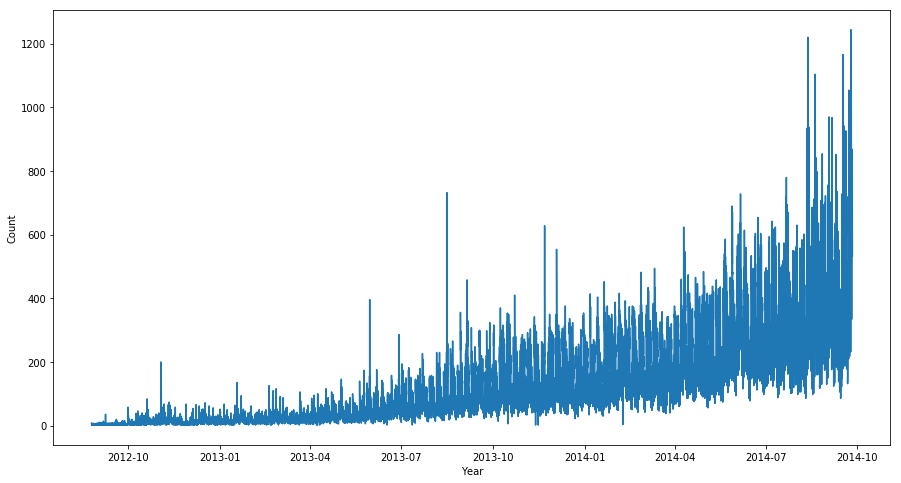

In [9]:
plt.figure(figsize=(15, 8))
plt.plot(data.Count)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [10]:
yearly_data = data.resample('Y').sum()
yearly_data.head()

,ID,Count
Datetime,,
2012-12-31,4791060,34932
2013-12-31,65485380,685968
2014-12-31,96939888,1820366


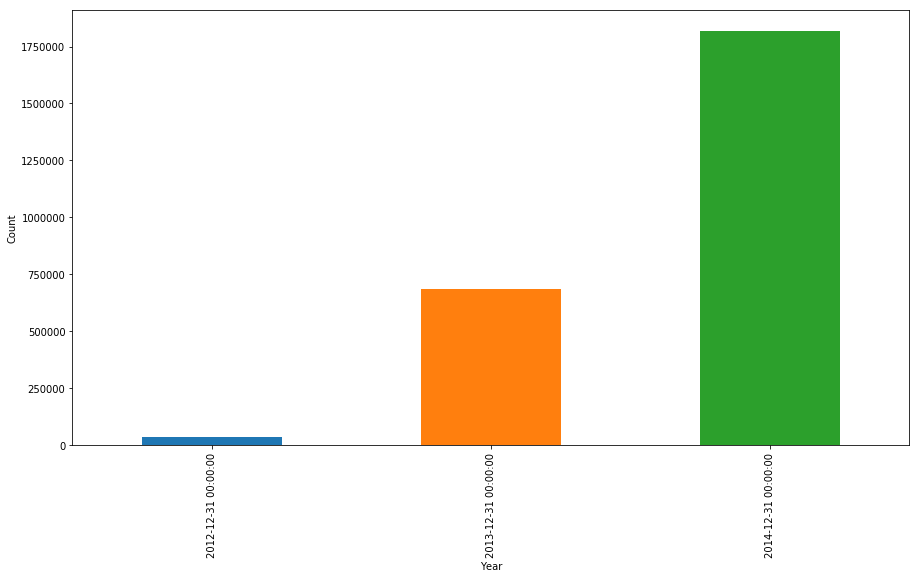

In [11]:
plt.figure(figsize=(15, 8))
yearly_data.Count.plot.bar()
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [12]:
monthly_data = data.resample('M').sum()
monthly_data.head()

,ID,Count
Datetime,,
2012-08-31,14028,496
2012-09-30,379800,3200
2012-10-31,937068,8174
2012-11-30,1433880,11396
2012-12-31,2026284,11666


In [13]:
monthly_data = data.groupby(data.index.month).sum()
monthly_data.head()

,ID,Count
Datetime,,
1,11677080,138112
2,11498592,149448
3,13784088,154442
4,14393520,198260
5,15962520,230722


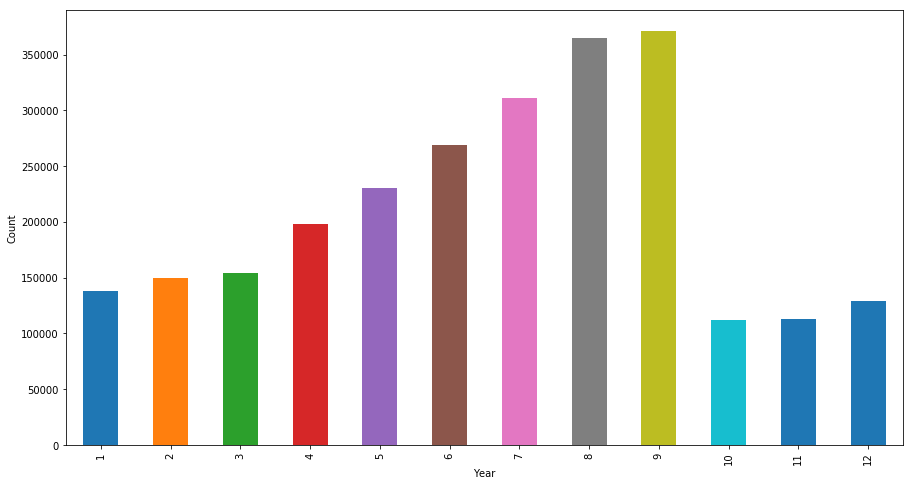

In [14]:
plt.figure(figsize=(15, 8))
monthly_data.Count.plot.bar()
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [15]:
daily_data = data.groupby(data.index.weekday).sum()
daily_data

,ID,Count
Datetime,,
0,23888004,412916
1,23950788,430988
2,24013572,427022
3,24076356,407250
4,23699952,375122
5,23762436,251292
6,23825220,236676


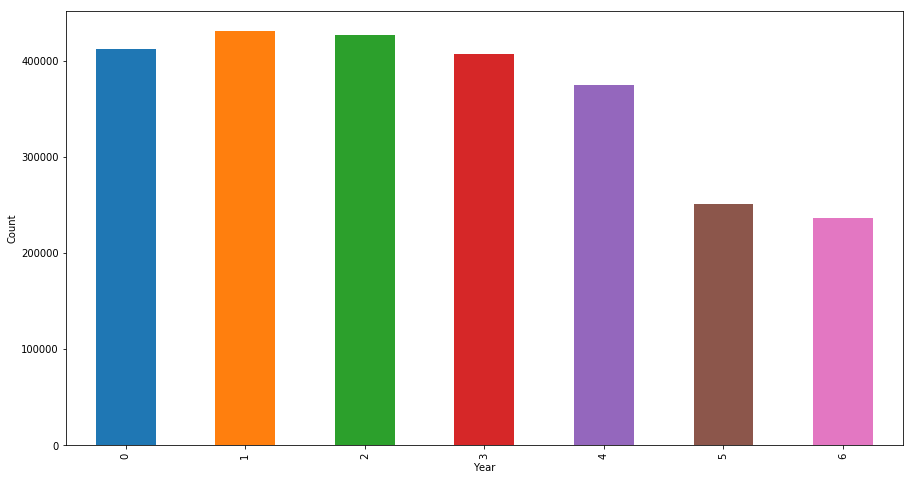

In [16]:
plt.figure(figsize=(15, 8))
daily_data.Count.plot.bar()
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [17]:
week_day = data.groupby(data.index.weekday_name).sum()
week_day

,ID,Count
Datetime,,
Friday,23699952,375122
Monday,23888004,412916
Saturday,23762436,251292
Sunday,23825220,236676
Thursday,24076356,407250
Tuesday,23950788,430988
Wednesday,24013572,427022


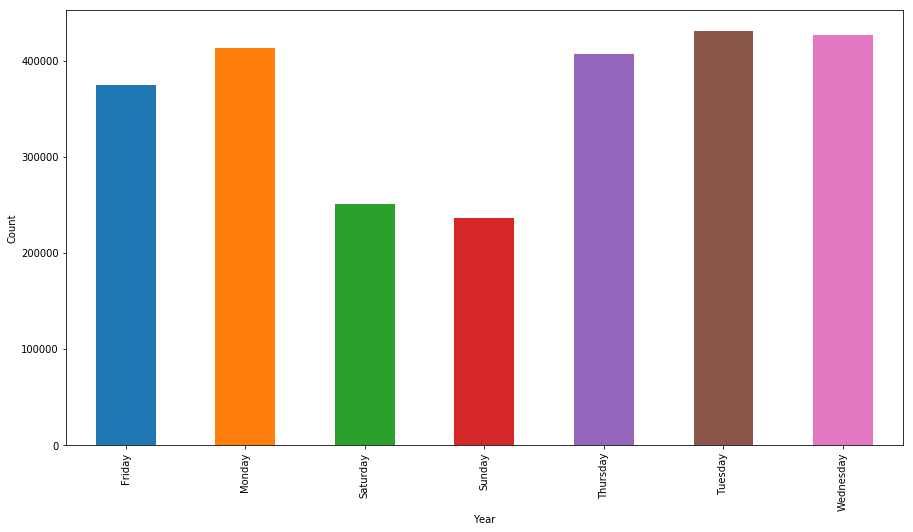

In [18]:
plt.figure(figsize=(15, 8))
week_day.Count.plot.bar()
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [19]:
hourly_data = data.groupby(data.index.hour).sum()
hourly_data

,ID,Count
Datetime,,
0,6958584,112544
1,6959346,89816
2,6960108,76012
3,6960870,62806
4,6961632,52864
5,6962394,47322
6,6963156,50884
7,6963918,59012
8,6964680,67956


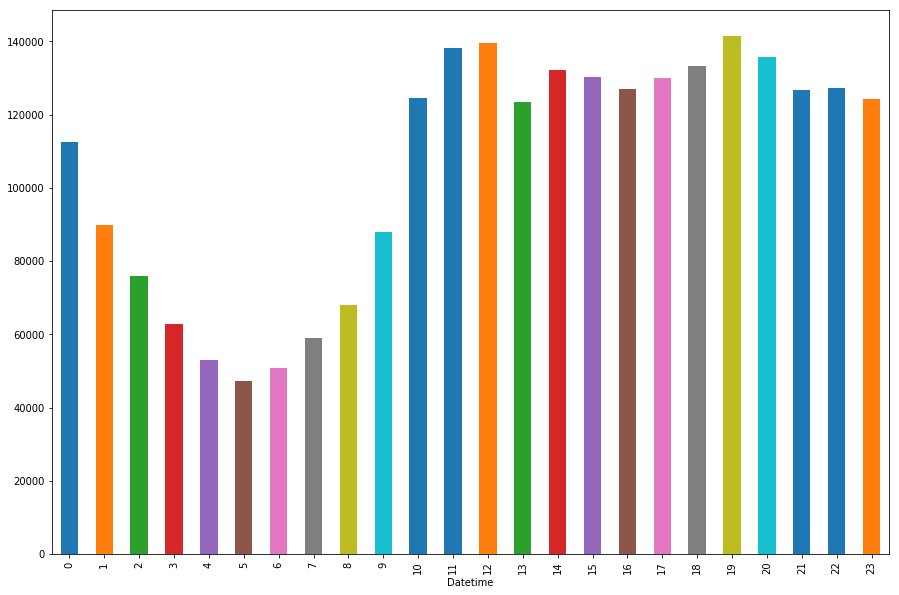

In [20]:
plt.figure(figsize=(15, 10))
hourly_data.Count.plot.bar()
plt.show()

### Resample the data to daily users

In [21]:
daily_data = data.resample('D').mean()
daily_data.head()

,ID,Count
Datetime,,
2012-08-25,11.5,3.166667
2012-08-26,35.5,3.666667
2012-08-27,59.5,2.583333
2012-08-28,83.5,2.416667
2012-08-29,107.5,2.500000


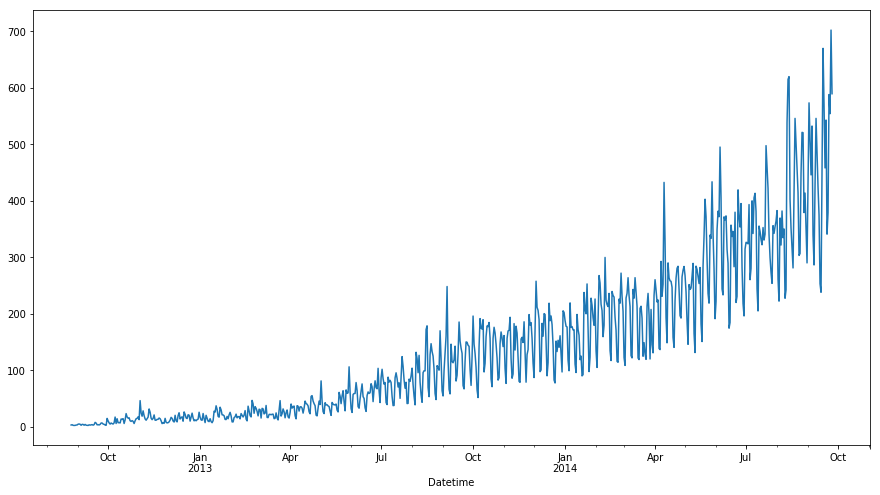

In [22]:
plt.figure(figsize=(15, 8))
daily_data.Count.plot()
plt.show()

### Split the data into train and validation data

In [23]:
training_data = daily_data.loc[:'2014-06-24']
validation_data = daily_data.loc['2014-06-25':]
training_data.tail()

,ID,Count
Datetime,,
2014-06-20,15947.5,379.916667
2014-06-21,15971.5,220.083333
2014-06-22,15995.5,230.833333
2014-06-23,16019.5,419.416667
2014-06-24,16043.5,372.166667


In [24]:
validation_data.head()

,ID,Count
Datetime,,
2014-06-25,16067.5,353.666667
2014-06-26,16091.5,395.250000
2014-06-27,16115.5,282.333333
2014-06-28,16139.5,218.250000
2014-06-29,16163.5,196.250000


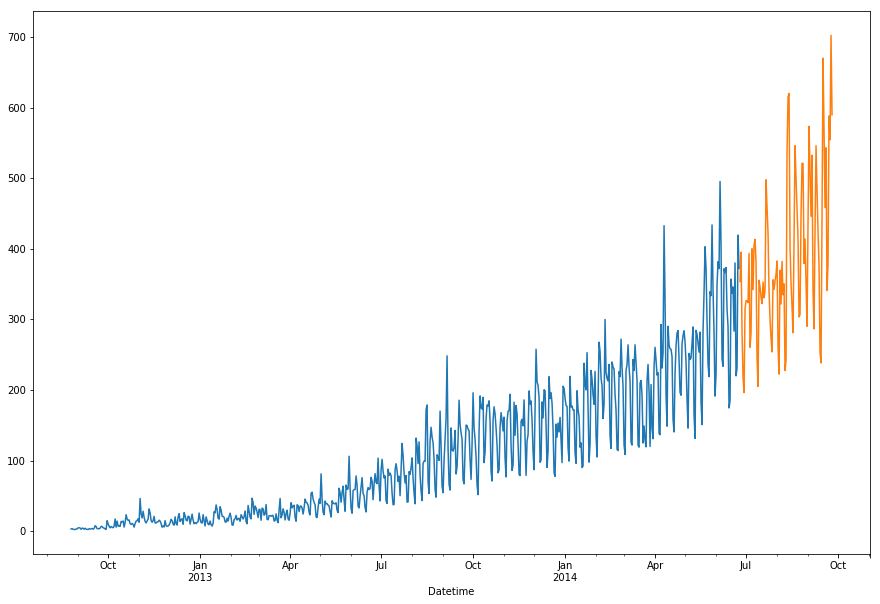

In [25]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
plt.show()

## Forecasting Methods

### Important Terms - 

#### Note:

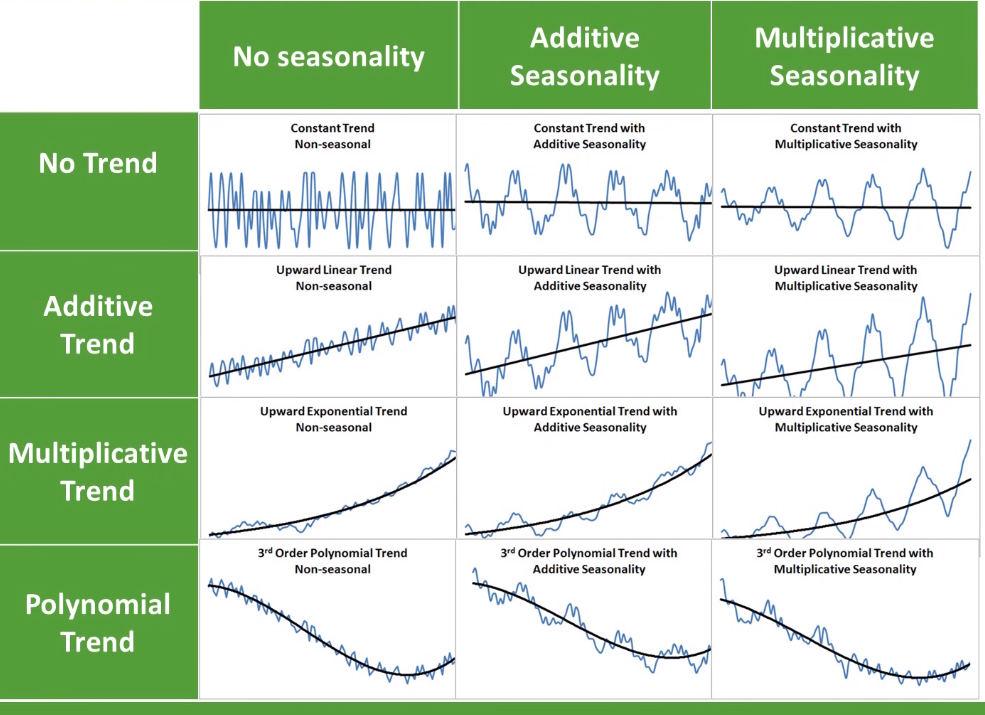

In [26]:
from IPython.display import Image
Image("Trend-Seasonality-Additive-Multiplicative.png")

### View all the above mentioned terms in our data set.

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [27]:
terms = seasonal_decompose(daily_data, model='additive')

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


In [28]:
print("Level/Observed in the dataset is: ", terms.observed)
print("Trend in the dataset is: ", terms.trend)
print("Seasonal in the dataset is: ", terms.seasonal)
print("Noise/Residual in the dataset is: ", terms.resid)

Level/Observed in the dataset is:                   ID       Count
Datetime                       
2012-08-25     11.5    3.166667
2012-08-26     35.5    3.666667
2012-08-27     59.5    2.583333
2012-08-28     83.5    2.416667
2012-08-29    107.5    2.500000
2012-08-30    131.5    3.083333
2012-08-31    155.5    3.250000
2012-09-01    179.5    4.666667
2012-09-02    203.5    4.916667
2012-09-03    227.5    4.500000
2012-09-04    251.5    2.750000
2012-09-05    275.5    4.333333
2012-09-06    299.5    4.166667
2012-09-07    323.5    2.833333
2012-09-08    347.5    4.166667
2012-09-09    371.5    2.833333
2012-09-10    395.5    2.666667
2012-09-11    419.5    2.416667
2012-09-12    443.5    3.500000
2012-09-13    467.5    3.000000
2012-09-14    491.5    3.500000
2012-09-15    515.5    3.833333
2012-09-16    539.5    2.916667
2012-09-17    563.5    3.833333
2012-09-18    587.5    7.833333
2012-09-19    611.5    6.583333
2012-09-20    635.5    3.500000
2012-09-21    659.5    3.750000
2012-

### Visualize the Level, Trend, Seasonality and Residual from the dataset

In [29]:
import statsmodels.api as sm

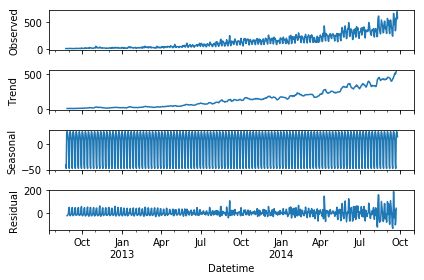

In [30]:
sm.tsa.seasonal_decompose(daily_data.Count).plot()
result = sm.tsa.stattools.adfuller(daily_data.Count)
plt.show()

### Naive Approach

In [27]:
naive_value = training_data.Count.iloc[-1]
naive_value

372.1666666666667

In [28]:
naive_approach = validation_data.copy()

In [29]:
naive_list = [naive_value for i in range(naive_approach.shape[0])]
len(naive_list)

93

In [30]:
naive_approach.shape[0]

93

In [31]:
naive_approach['Naive'] = naive_list
naive_approach.head()

,ID,Count,Naive
Datetime,,,
2014-06-25,16067.5,353.666667,372.166667
2014-06-26,16091.5,395.250000,372.166667
2014-06-27,16115.5,282.333333,372.166667
2014-06-28,16139.5,218.250000,372.166667
2014-06-29,16163.5,196.250000,372.166667


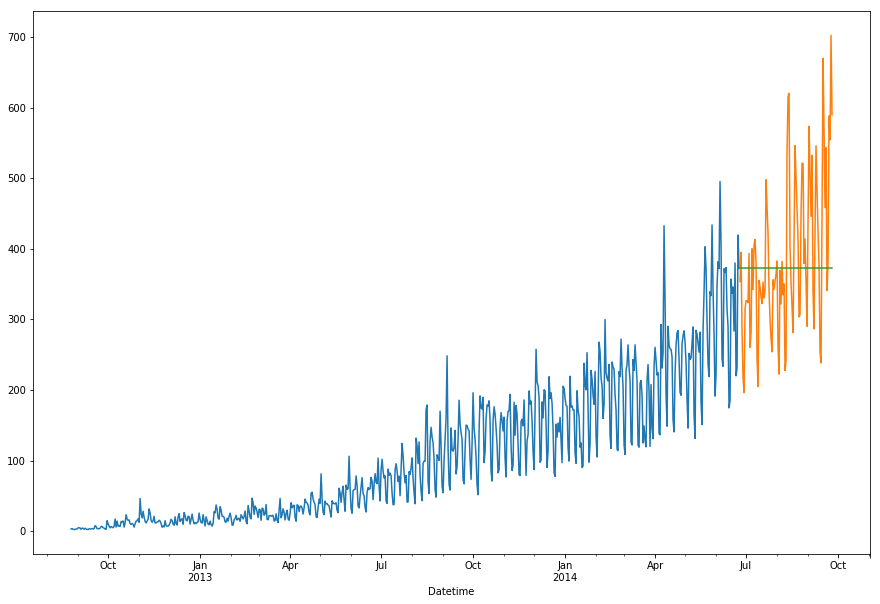

In [32]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
naive_approach.Naive.plot()
plt.show()

### Evaluating Naive Approach

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [34]:
rmse = sqrt(mean_squared_error(naive_approach.Naive, validation_data.Count))
print(rmse)

111.79050467496724


### Moving Approach

In [35]:
moving_approach = validation_data.copy()

In [36]:
moving_value = training_data.Count.rolling(30).mean().iloc[-1]
print(moving_value)

321.43333333333345


In [37]:
moving_approach_list = [moving_value for i in range(validation_data.shape[0])]
moving_approach['Moving'] = moving_approach_list

In [38]:
moving_approach.Moving.head()

Datetime
2014-06-25    321.433333
2014-06-26    321.433333
2014-06-27    321.433333
2014-06-28    321.433333
2014-06-29    321.433333
Freq: D, Name: Moving, dtype: float64

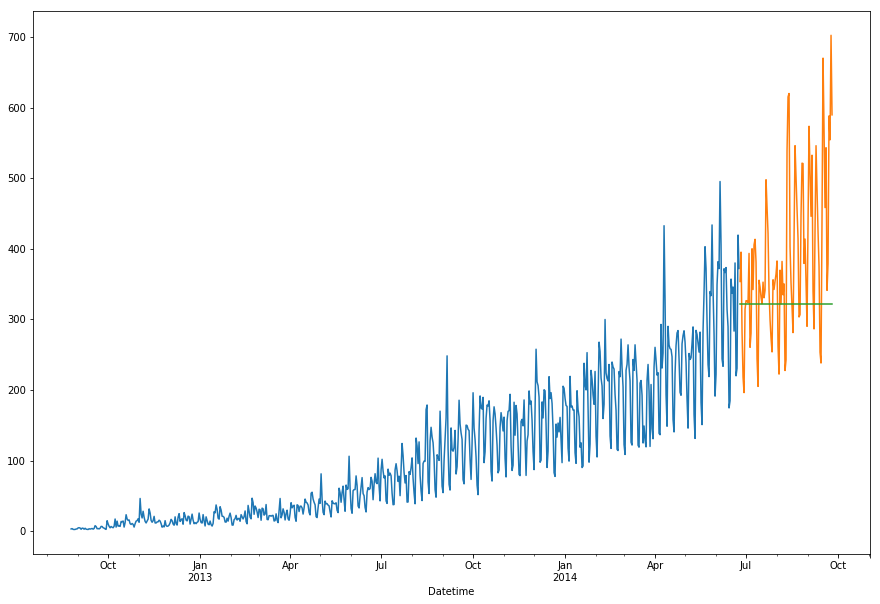

In [39]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
moving_approach.Moving.plot()
plt.show()

In [40]:
rmse_moving = sqrt(mean_squared_error(validation_data.Count, moving_approach.Moving))
print("Error for moving approach is - ", rmse_moving)

Error for moving approach is -  129.6495809983456


### Simple Exponential Approach

In [41]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
import numpy as np

In [42]:
ses_approach = validation_data.copy()

In [62]:
ses_data = SimpleExpSmoothing(np.asarray(training_data.Count)).fit(smoothing_level=0.6,optimized=False)
ses_approach['SES'] = ses_data.forecast(len(ses_approach))
ses_approach.head()

,ID,Count,SES
Datetime,,,
2014-06-25,16067.5,353.666667,363.522492
2014-06-26,16091.5,395.250000,363.522492
2014-06-27,16115.5,282.333333,363.522492
2014-06-28,16139.5,218.250000,363.522492
2014-06-29,16163.5,196.250000,363.522492


#### Smoothing Constant or Level (aplha - α) - 0 < α < 1

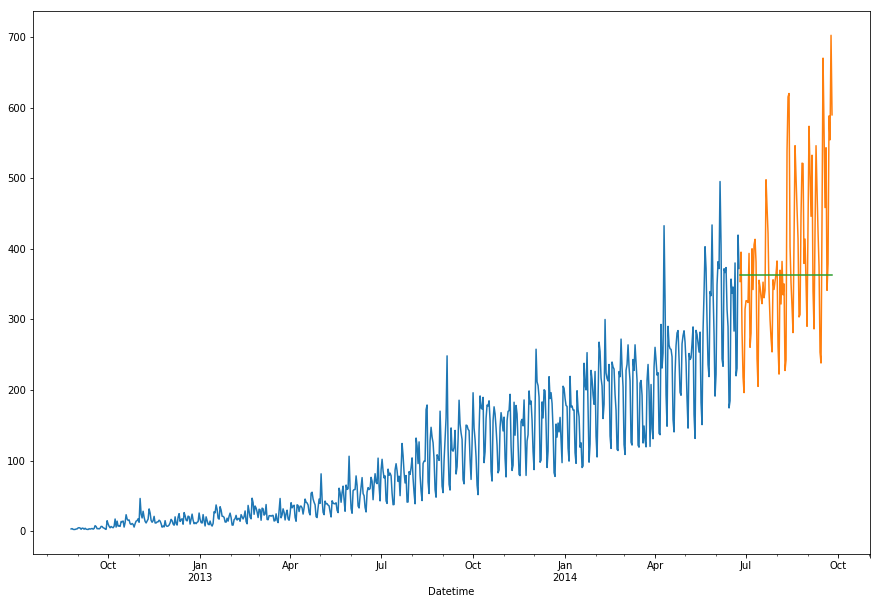

In [44]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
ses_approach.SES.plot()
plt.show()

In [45]:
rmse_ses_approach = sqrt(mean_squared_error(validation_data.Count, ses_approach.SES))
print("Simple Exponential Error is - ", rmse_ses_approach)

Simple Exponential Error is -  113.43708111884514


### Holtz's Linear Trend Model

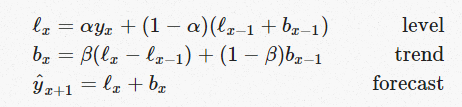

In [27]:
from IPython.display import Image
Image("Formula-Holts-Linear.png")

In [46]:
holt_approach = validation_data.copy()
holt_data = Holt(np.asarray(training_data.Count)).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
holt_approach['Holt'] = holt_data.forecast(len(validation_data))

In [47]:
holt_approach.Holt.head()

Datetime
2014-06-25    334.650767
2014-06-26    337.159011
2014-06-27    339.667256
2014-06-28    342.175500
2014-06-29    344.683745
Freq: D, Name: Holt, dtype: float64

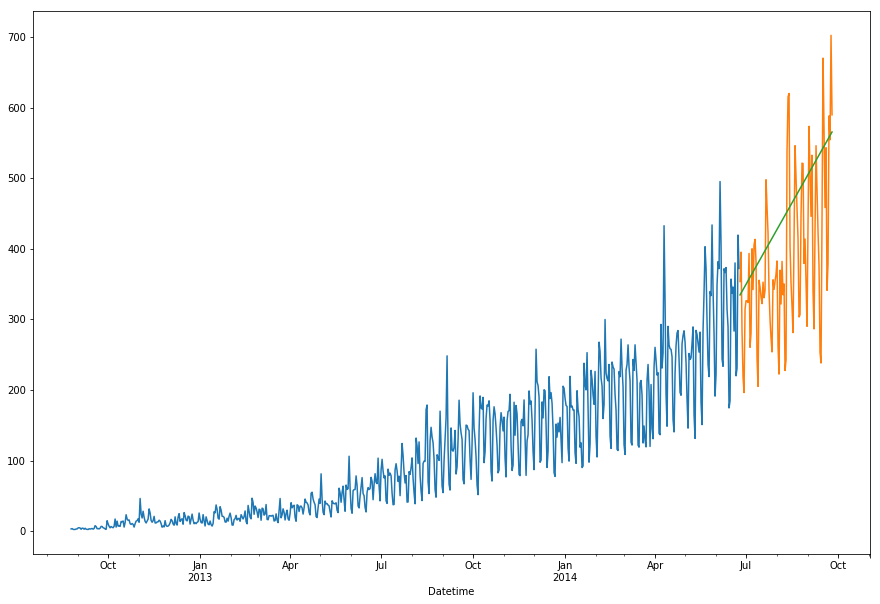

In [48]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
holt_approach.Holt.plot()
plt.show()

In [49]:
rmse_holt_approach = sqrt(mean_squared_error(validation_data.Count, holt_approach.Holt))
print("Error in holt approach is - ", rmse_holt_approach)

Error in holt approach is -  112.94278345314041


### Holt's Winter Model (For seasonality)

#### Formula - Level, Trend, Seasonality

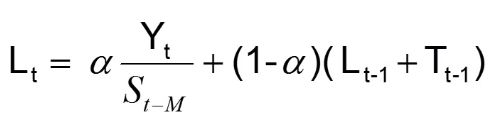

In [29]:
from IPython.display import Image
Image("Holts-Winter-Level.png")

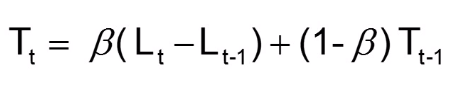

In [30]:
from IPython.display import Image
Image("Holts-Winter-Trend.png")

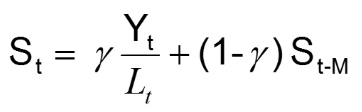

In [31]:
from IPython.display import Image
Image("Holts-Winter-Seasonality.png")

### Calculating Seasonal index

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing

In [52]:
holt_winter_approach = validation_data.copy()

In [59]:
holt_winter_data = ExponentialSmoothing(np.asarray(training_data.Count), seasonal_periods=7, trend='add', seasonal='add').fit()
holt_winter_data_list = holt_winter_data.forecast(len(validation_data))
holt_winter_approach['Winter_Data'] = holt_winter_data_list
holt_winter_approach.Winter_Data.head()

Datetime
2014-06-25    387.359560
2014-06-26    369.135738
2014-06-27    355.562024
2014-06-28    247.089851
2014-06-29    246.193399
Freq: D, Name: Winter_Data, dtype: float64

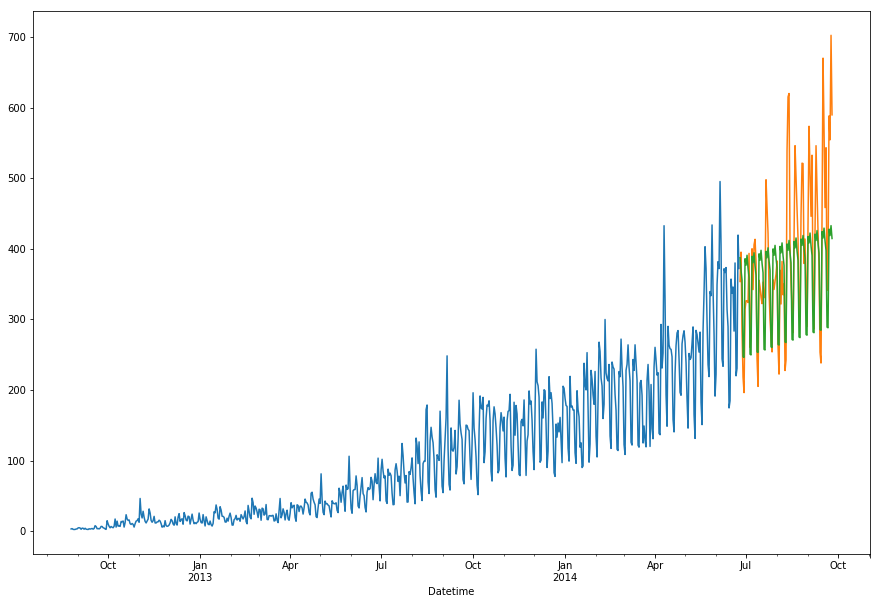

In [60]:
plt.figure(figsize=(15, 10))
training_data.Count.plot()
validation_data.Count.plot()
holt_winter_approach.Winter_Data.plot()
plt.show()

In [61]:
rmse_holt_winter_approach = sqrt(mean_squared_error(validation_data.Count, holt_winter_approach.Winter_Data))
print("Error in holt winter approach is - ", rmse_holt_winter_approach)

Error in holt winter approach is -  82.37900996094073
